# Séance 1

## Objectifs de la séance
- Utiliser les fonctions de base de control designer toolbox
- Tracer et analyser une réponse indicielle d’ordre 1 et 2
- Analyser le comportement d’un circuit RC/RL
- Analyser le comportement d’un moteur avec ou sans self


## Avant de commencer
Afin de pouvoir pour la suite utiliser les fonctions utiles, il est nécessaire d'importer dans chaque nouveau script les packages suivant:

In [1]:
from IPython.display import Image, display, Markdown

from control.matlab import *  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of HELMo Gramme

## Etude d'un système du premier ordre : RC

Soit la fonction de transfert: 

$$
 H(s)={\frac {1}{6,8*10^{-9}*s+1}}
$$

### Ecriture de la fonction de transfert du circuit RC

In [2]:
num = 1
den = [6.8e-9, 1]
H = tf(num, den)
print("H = ", H)

H =  
      1
-------------
6.8e-09 s + 1



:::{admonition} Attention
:class: warning
Ne pas confondre **.** et **,** !
:::

### Tracé de la réponse indicielle

[array([0.00000000e+00, 6.90606034e-04, 1.38073513e-03, ...,
        9.98998617e-01, 9.98999309e-01, 9.99000000e-01]),
 array([0.00000000e+00, 4.69774336e-12, 9.39548673e-12, ...,
        4.69633404e-08, 4.69680382e-08, 4.69727359e-08])]

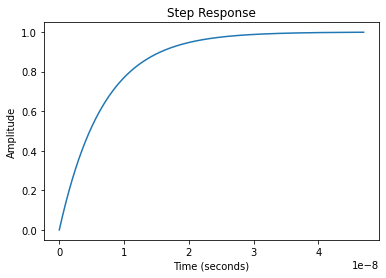

In [3]:
rlf.step_(H)

:::{admonition} Astuce
:class: tip
Pour éviter d'afficher les retours d'une fonction, il suffit de mettre un **;** en fin de ligne. 
:::

La fonction *step_* adapte automatiquement l’échelle des axes. Si vous voulez spécifier l’axe du temps :

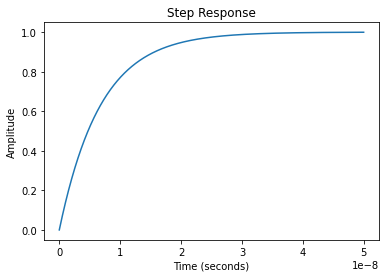

In [4]:
# Réponse à un échelon pendant 50ns (avec calcul toutes les ns)
T = np.linspace(0, 50e-9, 50) # Création vecteur T avec comme paramètres: début, fin, nbreElements
rlf.step_(H, T);

## Etude d'un système du premier ordre : moteur sans l

Lors de l’étude de l’application 1 d’asservissement de vitesse, nous avons montré que le moteur est décrit par la fonction de transfert :

$$
H_{mot}(s)={\frac {31,25}{10,875*10^{-3}*s+1}}
$$

### Ecriture de la fonction de transfert du moteur

In [5]:
num = 31.25
den = [10.875e-3, 1]
H = tf(num, den)
print("H = ", H)

H =  
    31.25
-------------
0.01087 s + 1



:::{admonition} Attention
:class: warning
Ne pas confondre **.** et **,** !
:::

### Tracé de la réponse indicielle 

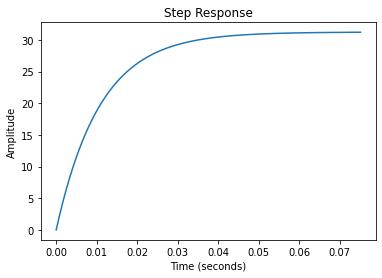

In [6]:
rlf.step_(H); # Tracé de la réponse indicielle

#### Considérations à propos du gain statique

Le gain statique est la valeur finale, la valeur atteinte en régime établi :

Le gain statique vaut : 31.21875000000746


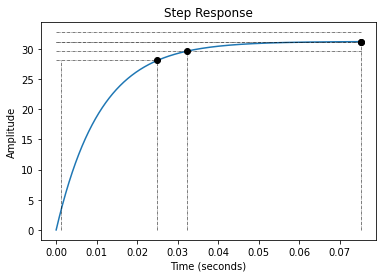

In [7]:
info = rlf.info() # Objet pour stocker les informations données par la réponse impulsionnelle.
rlf.stepWithInfo(H, info, NameOfFigure="Step Response with informations") # Même fonction que step_ avec le relevé et l'enregistrement des informations intéressantes en plus.
# plt.close() # Si on ne souhaite pas afficher le graphe
print("Le gain statique vaut :", info.DCGain) # Affichage de la valeur du gain statique.

##### Commentaires :
- Que représente le gain statique ?

- Quelle est son unité (dans le cas du moteur) ?

- Que se passe-t-il si le moteur tourne à vitesse nominale et que l’on augmente la tension de 1 V ?

- Comment doit varier la tension d’entrée pour faire passer la vitesse du moteur de 5000 tours/min à 6000 tours/min ?


:::{toggle}
- Les gain statique représente le gain du système en régime établi
- L'unité du gain est le $\frac{rad}{s*V}$
- Si on augmente la tension de consigne d'1V, \omega augmente de 31,25 rad/s
- Si on veut passer de 5000 tours/min à 6000 tours/min, il faut augmenter la tension en entrée de 3.35V
 
  - $\omega_{init}=\frac{5000*2*\pi}{60}$, $\omega_{final}=\frac{6000*2*\pi}{60}$
$\Rightarrow$ $\frac{\omega_{final}-\omega_{init}}{31.25}=3.35 V$
:::

#### Considérations temporelles

Déterminer le temps de réponse à 5% :

In [8]:
print("Le temps de réponse à 5% vaut :", info.SettlingTime, "secondes.") # Affichage de la valeur du temps de réponse à 5%.

Le temps de réponse à 5% vaut : 0.03237323760189344 secondes.


:::{note}
Par défaut, la fonction <i>stepWithInfo</i> relève et stocke dans l'objet <i>info</i> le temps de réponse à 5% mais on peut changer cela en le donnant en paramètre (cf. documentation de la librairie ReguLabFct).
:::

##### Exercice

###### Estimez la valeur de la constante de temps :

Par exemple : déterminer graphiquement, à 63% de la valeur finale = …………….. : $\tau$ =.....................

:::{admonition} Il est possible d’effectuer cette recherche sous forme mathématique
:class: dropdown
```
[Y,t]=step(H); # Permet de définir toutes les coordonnées de la réponse (ordonnée Y, temps t)
id=np.where(Y<=0.63*info.DCGain) # Renvoit tous les indices des points dont la valeur est sous la droite à 63% de la valeur finale.
tau=t[id[-1][-1]] # La constante de temps est la coordonnée t du dernier indice id
print("Tau =", tau, "secondes.")
```
:::

In [9]:
[Y,t]=step(H); # Permet de définir toutes les coordonnées de la réponse (ordonnée Y, temps t)
id=np.where(Y<=0.63*info.DCGain) # Renvoit tous les indices des points dont la valeur est sous la droite à 63% de la valeur finale.
tau=t[id[-1][-1]] # La constante de temps est la coordonnée t du dernier indice id

display(Markdown(f"Sachant que valeur finale vaut {info.DCGain:.2f}, on atteint 63% de cette valeur ({0.63*info.DCGain:.2f}) après une temps "r" $\tau$"f" de {1000*tau:.2f} ms."))

Sachant que valeur finale vaut 31.22, on atteint 63% de cette valeur (19.67) après une temps  $\tau$ de 10.62 ms.

## Etude d'un système du second ordre : moteur avec l

### Etude système du second ordre/pôles réels

#### 1)

La fonction de transfert du moteur lorsque l’on ne néglige pas l est :

$$
H_{mot_l}(s)={\frac {31,25}{1,36*10^{-6}*s^2+10,875*10^{-3}*s+1}}
$$

Dans la même figure, tracez la réponse indicielle du moteur lorsque l’on néglige l puis lorsqu’on ne le néglige pas.

H_avec_l =  
           31.25
----------------------------
1.36e-06 s^2 + 0.01087 s + 1



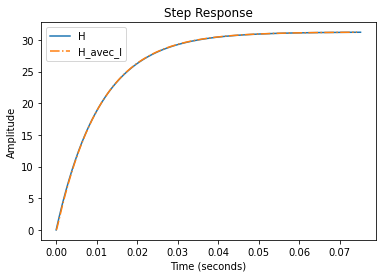

In [10]:
den_l = [1.36e-6, 10.875e-3, 1]
H_avec_l = tf(num, den_l)
print("H_avec_l = ", H_avec_l)
rlf.step_(H, NameOfFigure = "Step Response", sysName = 'H', linestyle='-')
rlf.step_(H_avec_l, NameOfFigure = "Step Response",  sysName = 'H_avec_l', linestyle='-.');

Convaincu que l est bien négligeable?

Zoomez à l’origine des courbes puis déplacez-vous le long des courbes pour visualiser l’effet de 2 pôles dont un dominant par rapport à une courbe avec le seul pôle dominant.

La fonction h_avec_l présente 2 pôles réels. Voici comment les calculer :

In [11]:
poles = pole(H_avec_l) # Fonction pour calculer les pôles d'une fonction de transfert.
print("p1 =", poles[0])
print("p2 =", poles[1])

p1 = -7903.287035309759
p2 = -93.03649410200626


Déterminez les 2 constantes de temps associées : 

In [12]:
tau_1 = -1/poles[0]
tau_2 = -1/poles[1]

print("tau_1 =", tau_1)
print("tau_2 =", tau_2)

tau_1 = 0.0001265296319787285
tau_2 = 0.010748470368021271


Le pôle dominant est .........., il est associé à la constante de temps ..........

:::{toggle}
Le pôle dominant est $p_2$ car il est associé à la constante de temps la plus grande, à savoir: $\tau_2$.
:::

#### 2) (Facultatif)

Tracez la réponse indicielle du circuit RL étudié au chapitre 2 pour $R=5,8\Omega$ et $L=750µH$ et relevez les grandeurs caractéristiques :

K=......

$\tau$ =......

$t_{r_{5\%}}$ =......


:::{toggle}
$
H(p)=\frac{I(p)}{V(p)}=\frac{1}{R+L*p}=\frac{K}{1+\tau*p}
$

$K=\frac{1}{R}=0.1724$

$\tau=\frac{L}{R}=1.2931*10^{-4}=129.31 µs$

$t_{r_{5\%}}=387*10^{-6}=387 µs =3\tau$
:::